In [1]:
import torch
import matplotlib.pyplot as plt

In [5]:
# Imports
trials = 50
n=100
results = torch.load("cbohealth_naivebo_ntrial={0}_n={1}.pt".format(trials,n), 
                     weights_only = True)

# Getting dimensions and names
n_result = len(results)
n_model = int(n_result/trials)

names = []
for i in range(n_result):
    if results[i]['name'] not in names:
        names.append(results[i]['name'])

In [6]:
EYdoX_eval = torch.zeros((len(results[0]['EYdoXeval']), trials, n_model))
for m in range(n_model):
    for t in range(trials):
        EYdoX_eval[:,t,m] = results[trials*m + t]['EYdoXeval'][:,0]

doX_eval = torch.zeros((len(results[0]['doXeval']), trials, n_model))
for m in range(n_model):
    for t in range(trials):
        doX_eval[:,t,m] = results[trials*m + t]['doXeval'][:,0]

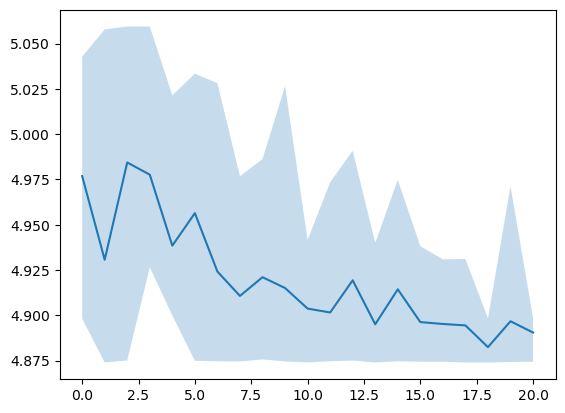

In [14]:
m = 0
plt.plot(EYdoX_eval[...,m].mean(1))
plt.fill_between(torch.arange(len(EYdoX_eval)),EYdoX_eval[...,m].quantile(0.1,1),
                 EYdoX_eval[...,m].quantile(0.9,1), alpha = 0.25)   